# Homework 1: Aircraft inventory analysis

In this homework, we will explore the aircraft inventory dataset from 2006 to 2023 (Source: Bureau of Transportation Statistics, www.bts.gov).  

**Some useful resources:**
- You may find explanation of the dataset attributes available in [BTS dataset attribute summary](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=GEH).
- You may verify some of your analyses by comparing your results with the BTS analysis dashboard.  The dashboard is reachable via the "Analysis" column in the attribute summary linked above.

**General rules of thumb for homeworks:**
- Read the homework questions carefully.
- Explain your choices.
- Present your findings concisely.
- Use tables, plots, and summary statistics to aid your presentation of findings.
- If you have an idea in mind but could not implement (in code), present the idea thoroughly and how you would have implemented the code. 

### Tasks:

For all tasks below, create one or more functions for any systematic changes to the dataset.  For instance, someone could run the sequence of functions to transform the dataset.

Specify the sequence of functions.

1. Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible.  Give your reasoning and code for how you decide to impute missing values.  
    - Columns for investigation: `CARRIER`, `CARRIER_NAME`, `MANUFACTURE_YEAR`, `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`, and `AIRLINE_ID`.
    - For example, watch out for "North American Airlines" aircrafts.  Are the `CARRIER`/`UNIQUE_CARRIER` column *really* missing?

2. Inspect the columns `MANUFACTURER`, `MODEL`, `AIRCRAFT_STATUS`, and `OPERATING_STATUS`.  Decide, for each column, if transformation or standardization of data are required.  Give your reasoning and code if you decide to transform the data.  

    **Hints:**
    - For very messy data like manufacturer/model names, give your best attempt. It is okay to not catch them all.
    - Use `value_counts()` to identify "big wins".
    - Break down into multiple steps, instead of having one line of code to do them all.

3. Remove data rows that still have missing values.  Report the amount of remaining data you obtained.

4. Transformation and derivative variables
   - For the columns `NUMBER_OF_SEATS` and `CAPACITY_IN_POUNDS`, check the skewness in the variable and plot a histogram for each variable.
   - The Box-Cox transformation (`scipy.stats.boxcox`) is one possible way to transform variables into a "more-normal-like" variable.  Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. `XXXXXXXXX_BOXCOX`.
   - Plot a histogram for each transformed variable.
   - Describe what you observe before and after transformation.

5. Feature engineering
    - Create a new column `SIZE` by the quartiles of `NUMBER_OF_SEATS`
        - below 25% percentile: `SMALL`
        - 25% - 50% percentile: `MEDIUM`
        - 50% - 75% percentile: `LARGE`
        - above 75% percentile: `XLARGE`
    - For each size group, provide and plot the proportions of aircrafts that are operating versus not (`OPERATING_STATUS`). 
    - For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (`AIRCRAFT_STATUS`).
    - Provide a written summary of your findings.

### Dataset
You may read in the dataset with the following code.  Otherwise, you can find the [dataset](https://github.com/mosesyhc/de300-2026wi/raw/refs/heads/main/datasets/T_F41SCHEDULE_B43.zip) available in the `dataset` directory.  *Note* that `pandas.read_csv()` is capable of reading a zipped .csv file and no unzipping is required.

In [165]:
import pandas as pd
inventory = pd.read_csv('dataset/T_F41SCHEDULE_B43.zip')

C:\Users\kcui2\AppData\Local\Temp\ipykernel_16144\2100157953.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('dataset/T_F41SCHEDULE_B43.zip')


### 0. Quick Look at the Data

In [166]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

In [167]:
inventory.head()

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
0,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7858,N202PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/28/2003 12:00:00 AM,20397.0,16
1,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7860,N206PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/30/2003 12:00:00 AM,20397.0,16
2,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7873,N207PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,11/26/2003 12:00:00 AM,20397.0,16
3,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7874,N209PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/4/2003 12:00:00 AM,20397.0,16
4,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7879,N213PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/16/2003 12:00:00 AM,20397.0,16


In [168]:
inventory.describe()

,YEAR,MANUFACTURE_YEAR,NUMBER_OF_SEATS,CAPACITY_IN_POUNDS,AIRLINE_ID
count,132313.000000,132310.000000,132306.000000,132212.000000,132208.000000
mean,2014.657706,2000.399992,110.619859,71313.508131,20051.606559
std,5.270037,39.630346,77.424860,87093.991985,380.917190
min,2006.000000,0.000000,0.000000,0.000000,19386.000000
25%,2010.000000,1995.000000,50.000000,34446.000000,19805.000000
50%,2015.000000,2001.000000,125.000000,43400.000000,19977.000000
75%,2019.000000,2007.000000,160.000000,82012.000000,20366.000000
max,2023.000000,2756.000000,737.000000,875000.000000,22085.000000


In [169]:
inventory.isna().sum()

YEAR                       0
CARRIER                   49
CARRIER_NAME             105
MANUFACTURE_YEAR           3
UNIQUE_CARRIER_NAME      105
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            7
MANUFACTURER               0
AIRCRAFT_TYPE          29933
MODEL                     11
CAPACITY_IN_POUNDS       101
ACQUISITION_DATE         967
AIRLINE_ID               105
UNIQUE_CARRIER           164
dtype: int64

### 1. Imputation
**Columns**: `CARRIER`, `CARRIER_NAME`, `MANUFACTURE_YEAR`, `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`, and `AIRLINE_ID`

In [170]:
### HELPER FUNCTIONS

''' 
    gotcha here! in the dataset, the carrier and unique carrier id's aren't missing, they are just actually "NA"
    so no CARRIER is actually missing from the data set, and we need to take care of this separately
    1. standardize the carrier codes
    2. take care of North American carrier codes

'''

# first standardize the carrier codes in case (whitespace/blank strings --> NaN)
def standardCarrierCodes(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for col in ["CARRIER", "UNIQUE_CARRIER"]:
        df[col] = df[col].astype("string").str.strip()
        df.loc[df[col] == "", col] == pd.NA
    return df

# take care of North American separately
def northAmericanCarrier(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    if "CARRIER" in df.columns:
        df["CARRIER"] = df["CARRIER"].fillna("NA")

    return df

''' 
    taking care of UNIQUE_CARRIER missing values by filling from CARRIER
    logic: for a given carrier + year, there can be one unique carrier code in this dataset
    so we can check for the carrier and year, make comparison, and determine a unique carrier code from that

    notes from just looking at the spreadsheet
    * L4 --> L4: no other L4 unique carrier code, carrier name exists, no historical reuse conflicts
    * OH missing (54612-54708), OH(1) is used by COMAIR (sometimes? OH is also used), OH is used by PSA Airlines
    *** i can't seem to find a way to identify carrier information for the missing OHs == these values should be DROPPED

'''

# drop rows if unable to impute UNIQUE_CARRIERS due to ambiguous information
def dropAmbiguousUniqueCarrier(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # this is only noticed when CARRIER == "OH"
    ambiguous = df["CARRIER"].eq("OH") & df["UNIQUE_CARRIER"].isna()

    # updates dataframe to one without the ambiguous values
    df = df.loc[~ambiguous]

    return df

In [171]:
def fillGroup(df: pd.DataFrame, target: str, key_columns: list[str]) -> pd.DataFrame:
    df = df.copy()

    known = df.dropna(subset=key_columns + [target])

    target_map = (
        known.groupby(key_columns)[target]
        .first()
    )

    missing = df[target].isna()
    df.loc[missing, target] = (
        df.loc[missing]
        .set_index(key_columns)
        .index.map(target_map)
    )

    return df

def fillAll(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # standardize carrier codes
    df = standardCarrierCodes(df)

    # take care of North American carrier specific cases
    df = northAmericanCarrier(df)

    # drop ambiguous unique carrier codes 
    # (missing unique carrier odes with carrier codes "OH" 
    # -- there's no 100% way to determine the unique carrier code from the provided information)
    df = dropAmbiguousUniqueCarrier(df)

    # fill unique carrier
    df["UNIQUE_CARRIER"] = df["UNIQUE_CARRIER"].fillna(df["CARRIER"])

    # fill carrier name (related to carrier, serial number, and tail number)
    df = fillGroup(df, "CARRIER_NAME", ["CARRIER", "SERIAL_NUMBER", "TAIL_NUMBER"])

    # fill unique carrier name
    df["UNIQUE_CARRIER_NAME"] = df["UNIQUE_CARRIER_NAME"].fillna(df["CARRIER_NAME"])

    # fill manufacture year (related to serial and tail number)
    df = fillGroup(df, "MANUFACTURE_YEAR", ["SERIAL_NUMBER", "TAIL_NUMBER"])

    # fill number of seats (related to aircraft type and model)
    df = fillGroup(df, "NUMBER_OF_SEATS", ["AIRCRAFT_TYPE", "MODEL"])

    # fill capacity in pounds (related to aircraft type and model)
    df = fillGroup(df, "CAPACITY_IN_POUNDS", ["AIRCRAFT_TYPE", "MODEL"])

    # fill airline id (related to serial and tail number)
    df = fillGroup(df, "AIRLINE_ID", ["SERIAL_NUMBER", "TAIL_NUMBER"])

    # fill aircraft type (related to serial and tail number)
    df = fillGroup(df, "AIRCRAFT_TYPE", ["SERIAL_NUMBER", "TAIL_NUMBER"])

    # fill model (related to serial and tail number)
    df = fillGroup(df, "MODEL", ["SERIAL_NUMBER", "TAIL_NUMBER"])
    
    # fill acquisition date (related to serial number, tail number, and airline id)
    df = fillGroup(df, "ACQUISITION_DATE", ["SERIAL_NUMBER", "TAIL_NUMBER", "AIRLINE_ID"])

    return df


In [172]:
inventory_filled = fillAll(inventory)

inventory_filled.isna().sum()

YEAR                       0
CARRIER                    0
CARRIER_NAME               0
MANUFACTURE_YEAR           1
UNIQUE_CARRIER_NAME        0
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            0
MANUFACTURER               0
AIRCRAFT_TYPE          11220
MODEL                      0
CAPACITY_IN_POUNDS         0
ACQUISITION_DATE           6
AIRLINE_ID                 0
UNIQUE_CARRIER             0
dtype: int64

### 2: Transformation and Standardization
**Columns**: `MANUFACTURER`, `MODEL`, `AIRCRAFT_STATUS`, and `OPERATING_STATUS`

In [174]:
# taking a look at unique values of MANUFACTURER
inventory_filled["MANUFACTURER"].unique()

array(['CANADAIR', 'CURTISS', 'MCDONNELL-DOUGLAS', 'PIPER', 'CESSNA',
       'EMBRAER', 'BOEING', 'AIRBUS', 'FOKKER', 'ATR', 'BELL',
       'FAIRCHILD', 'CONVAIR', 'LOCKHEED', 'SAAB AIRCRAFT', 'BAE',
       'BOMBARDIER', 'DEHAVILLAND', 'DASSULT SUD', 'BEECHCRAFT',
       'BOEING                                                                          ',
       'DORNIER                                                                         ',
       'IAI                                                                             ',
       'GULFSTREAM                                                                      ',
       'BOMBARDIER                                                                      ',
       'RAYTHEON                                                                        ',
       'CESSNA                                                                          ',
       'CANADAIR                                                                        ',
       

In [175]:
# after taking a look at the manufacturer values, i believe we can clean by removing whitespace, removing noise words, dropping some punctuation, 
# and also just fitting values into commonly seen values
# the values with slashes need to be handled separately (choose between the two)

def standardizeManufacturer(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    s = df["MANUFACTURER"].astype("string")

    # keep "/" for manufacturer/lessor strings and drop other punctuation
    s = s.str.replace(r"[^\w\s/]", " ", regex=True)
    s = s.str.replace(r"\s+", " ", regex=True).str.strip()

    # insert space between lower to uppercase transitions
    s = s.str.replace(r"(?<=[A-Z])(?=[A-Z][a-z])", " ", regex=True)

    # insert space between letters and numbers
    s = s.str.replace(r"(?<=[A-Z])(?=\d)", " ", regex=True)
    s = s.str.replace(r"(?<=\d)(?=[A-Z])", " ", regex=True)

    # capitalize
    s = s.str.upper()

    # remove noise words
    noise_words = [
        "THE", "COMPANY", "CO", "CORP", "CORPORATION", "INC", "LTD", "LIMITED",
        "INDUSTRIES", "INDUSTRY", "AEROSPACE", "AIRCRAFT", "SERVICES"
    ]
    pattern = r"\b(" + "|".join(noise_words) + r")\b"
    s = (
        s.str.replace(pattern, "", regex=True)
         .str.replace(r"\s+", " ", regex=True)
         .str.strip()
    )

    # fit values into common ones
    common = {
        "BOEING": ["BOEING"],
        "AIRBUS": ["AIRBUS"],
        "BOMBARDIER": ["BOMBARDIER", "CANADAIR"],
        "EMBRAER": ["EMBRAER"],
        "MCDONNELL DOUGLAS": ["MCDONNELL", "DOUGLAS", "MDDOUGLAS"],
        "CESSNA": ["CESSNA", "CSSNA"],
        "GULFSTREAM": ["GULFSTREAM"],
        "RAYTHEON": ["RAYTHEON", "RAETHEON"],
        "DASSAULT": ["DASSAULT", "FALCON"],
        "SAAB": ["SAAB"],
        "LOCKHEED": ["LOCKHEED"],
        "FOKKER": ["FOKKER"],
        "ATR": ["ATR"],
        "DORNIER": ["DORNIER"],
        "IAI": ["IAI", "ISRAEL AIRCRAFT", "ISRAELAIRCRAFT"],
        "DE HAVILLAND": ["DEHAVILLAND", "DE HAVILLAND"],
        "BEECHCRAFT": ["BEECH"],
        "BELL": ["BELL"],
        "FAIRCHILD": ["FAIRCHILD"],
        "CONVAIR": ["CONVAIR"],
        "PIPER": ["PIPER"],
        "SIKORSKY": ["SIKORSKY"],
        "AGUSTA WESTLAND": ["AGUSTA", "WESTLAND"],
        "AEROSPATIALE": ["AEROSPATIALE"],
        "CASA": ["CASA"],
        "PILATUS": ["PILATUS"],
    }

    def bucket(x):
        if pd.isna(x) or x == "":
            return pd.NA

        # if there is a slash, look at both sides and pick the one that matches a common keyword
        parts = [p.strip() for p in str(x).split("/") if p.strip()]
        candidates = parts if parts else [str(x)]

        for cand in candidates:
            for canon, keys in common.items():
                if any(k in cand for k in keys):
                    return canon

        return "OTHER"

    df["MANUFACTURER"] = s.apply(bucket)
    return df


In [176]:
inventory_filled = standardizeManufacturer(inventory_filled)
inventory_filled["MANUFACTURER"].value_counts()

MANUFACTURER
BOEING               55639
AIRBUS               23517
BOMBARDIER           16247
EMBRAER              15554
MCDONNELL DOUGLAS    10712
CESSNA                4515
OTHER                 1916
ATR                   1181
DE HAVILLAND          1084
SAAB                   600
GULFSTREAM             446
CONVAIR                208
LOCKHEED               158
DASSAULT               138
DORNIER                100
PIPER                   36
FOKKER                  27
PILATUS                 24
RAYTHEON                22
CASA                    21
FAIRCHILD               20
AEROSPATIALE            20
IAI                     11
SIKORSKY                 7
AGUSTA WESTLAND          7
BEECHCRAFT               4
BELL                     2
Name: count, dtype: int64

In [177]:
# taking a look at model
inventory_filled["MODEL"].value_counts()

MODEL
EMB-145          2614
B-737-7H4        2470
B737-823         2370
A320-232         2333
A321-231         2259
                 ... 
B-777-212           1
B-777-2U8           1
B767-328            1
CHAL-601-3A         1
ERJ170-200STD       1
Name: count, Length: 1340, dtype: int64

In [178]:
def standardizeModel(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    s = df["MODEL"].astype("string").str.strip().str.upper()

    # remove punctuation except hyphen and space
    s = s.str.replace(r"[^\w\s\-]", " ", regex=True)
    s = s.str.replace(r"\s+", " ", regex=True).str.strip()

    # normalize Boeing prefixes: B737-800 / BOEING 737 800 -> 737-800
    # (only when it looks like 3 digits + 3 digits)
    s = s.str.replace(r"\bB\s*(\d{3})\s*[- ]?\s*(\d{3})\b", r"B\1-\2", regex=True)
    s = s.str.replace(r"\bBOEING\s*(\d{3})\s*[- ]?\s*(\d{3})\b", r"B\1-\2", regex=True)

    # normalize Airbus: A 320 214 -> A320-214
    s = s.str.replace(r"\bA\s*(\d{3})\s*[- ]?\s*(\d{3})\b", r"A\1-\2", regex=True)

    # collapse spaces around hyphens
    s = s.str.replace(r"\s*-\s*", "-", regex=True)

    df["MODEL"] = s
    return df


In [179]:
inventory_filled = standardizeModel(inventory_filled)
inventory_filled["MODEL"].value_counts()

MODEL
EMB-145          2976
B-737-7H4        2470
B737-823         2370
A320-232         2333
A321-231         2259
                 ... 
727225-CARGO        1
PREMIER             1
604 605             1
DC-9-82 MD82        1
ERJ170-200STD       1
Name: count, Length: 1266, dtype: Int64

In [180]:
inventory_filled['AIRCRAFT_STATUS'].unique()

array(['B', 'O', 'A', 'b', 'a', 'o', 'L'], dtype=object)

In [181]:
# from the attribute summary, there should only be A, B, and O
# so we need to standardize with some capitalization, then drop "L" values because we can't determine what it is
def standardizeAircraftStatus(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # normalize
    s = df["AIRCRAFT_STATUS"].astype("string").str.strip().str.upper()

    # keep only valid codes
    valid = {"A", "B", "O"}  # based on attribute summary
    mask_valid = s.isin(valid)

    df["AIRCRAFT_STATUS"] = s

    # drop invalid rows with L
    df = df.loc[mask_valid].copy()

    return df


In [182]:
inventory_filled = standardizeAircraftStatus(inventory_filled)
inventory_filled["AIRCRAFT_STATUS"].value_counts()

AIRCRAFT_STATUS
O    79464
B    43551
A     9079
Name: count, dtype: Int64

In [183]:
inventory_filled['OPERATING_STATUS'].unique()

array(['Y', 'N', 'y', ' '], dtype=object)

In [184]:
# from the attribute summary, there should only be Y and N
# so we need to standardize with some capitalization, then drop blank whitespace values because we can't determine what it is
def standardizeOperatingStatus(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # normalize
    s = df["OPERATING_STATUS"].astype("string").str.strip().str.upper()

    # keep only valid codes
    valid = {"Y", "N"}  # based on attribute summary
    mask_valid = s.isin(valid)

    df["OPERATING_STATUS"] = s

    # drop invalid rows with L
    df = df.loc[mask_valid].copy()

    return df

In [185]:
inventory_filled = standardizeOperatingStatus(inventory_filled)
inventory_filled["OPERATING_STATUS"].value_counts()

OPERATING_STATUS
Y    126443
N      5650
Name: count, dtype: Int64

In [186]:
def standardizeAll(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df = standardizeManufacturer(df)
    df = standardizeModel(df)
    df = standardizeAircraftStatus(df)
    df = standardizeOperatingStatus(df)

    return df

In [187]:
inventory_filled_and_standardized = standardizeAll(inventory_filled)

### 3. Removing Data Rows
Data already dropped in earlier work:
- rows with invalid values in `AIRCRAFT_STATUS` and `OPERATING_STATUS`

In [191]:
# checking what is left
inventory_filled_and_standardized.isna().sum()

YEAR                       0
CARRIER                    0
CARRIER_NAME               0
MANUFACTURE_YEAR           1
UNIQUE_CARRIER_NAME        0
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            0
MANUFACTURER               0
AIRCRAFT_TYPE          11220
MODEL                      0
CAPACITY_IN_POUNDS         0
ACQUISITION_DATE           6
AIRLINE_ID                 0
UNIQUE_CARRIER             0
dtype: int64

In [195]:
# at this point, we've imputed what we could based on relationships of columns and looking for correlation through the dataset
# for the rest of the N/A values, there's no 100% way of determining accurate data to impute
# so we will drop the remaining rows with N/A values

inventory_filled_standardized_dropped = inventory_filled_and_standardized.dropna(subset=["CARRIER", 
                                                   "CARRIER_NAME", 
                                                   "MANUFACTURE_YEAR", 
                                                   "NUMBER_OF_SEATS", 
                                                   "CAPACITY_IN_POUNDS", 
                                                   "AIRLINE_ID", 
                                                   "UNIQUE_CARRIER", 
                                                   "UNIQUE_CARRIER_NAME",
                                                   "AIRCRAFT_TYPE",
                                                   "MODEL",
                                                   "ACQUISITION_DATE"])

inventory_filled_standardized_dropped.isna().sum()

YEAR                   0
CARRIER                0
CARRIER_NAME           0
MANUFACTURE_YEAR       0
UNIQUE_CARRIER_NAME    0
SERIAL_NUMBER          0
TAIL_NUMBER            0
AIRCRAFT_STATUS        0
OPERATING_STATUS       0
NUMBER_OF_SEATS        0
MANUFACTURER           0
AIRCRAFT_TYPE          0
MODEL                  0
CAPACITY_IN_POUNDS     0
ACQUISITION_DATE       0
AIRLINE_ID             0
UNIQUE_CARRIER         0
dtype: int64

### 4. Transformation and Derivative Variables
Columns targeted: `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`

In [199]:
import matplotlib.pyplot as plt
inventory_new = inventory_filled_standardized_dropped

In [200]:
inventory_new['NUMBER_OF_SEATS'].skew()

0.410238760147838

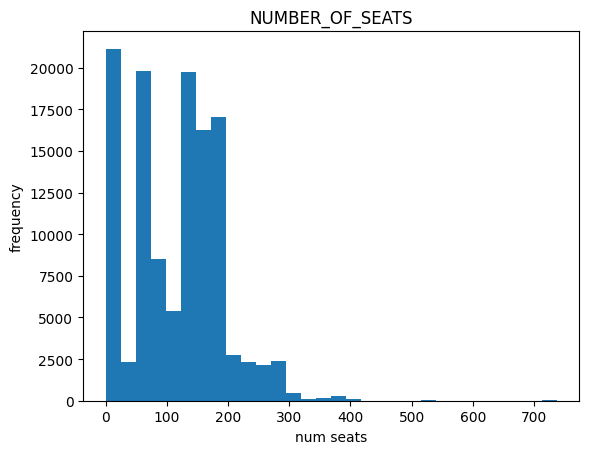

In [203]:
plt.hist(inventory_new["NUMBER_OF_SEATS"].dropna(), bins=30)
plt.title("NUMBER_OF_SEATS")
plt.xlabel("num seats")
plt.ylabel("frequency")
plt.show()

In [198]:
inventory_new['CAPACITY_IN_POUNDS'].skew()

3.9884868717409394

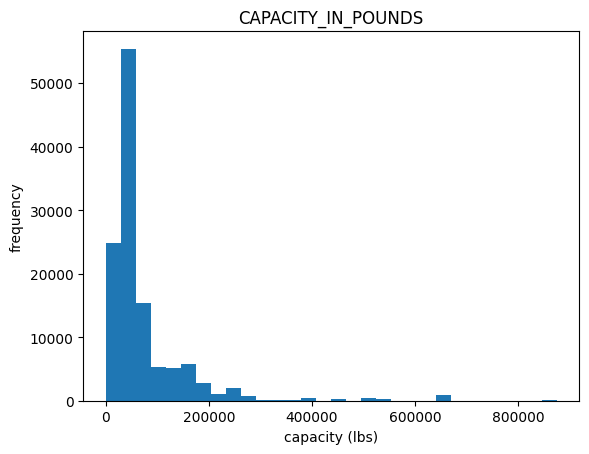

In [204]:
plt.hist(inventory_new["CAPACITY_IN_POUNDS"].dropna(), bins=30)
plt.title("CAPACITY_IN_POUNDS")
plt.xlabel("capacity (lbs)")
plt.ylabel("frequency")
plt.show()

In [211]:
# box cox transformation
from scipy.stats import boxcox

num_seats = inventory_new['NUMBER_OF_SEATS']
capacity = inventory_new['CAPACITY_IN_POUNDS']

# there are 0 values that box cox cannot handle, so we are gonna shift the values such that all are positive and non-zero but the distribution doesn't change
shift_seats = 1 - num_seats.min() if num_seats.min() <= 0 else 0
seats_shifted = num_seats + shift_seats

shift_cap = 1 - capacity.min() if capacity.min() <= 0 else 0
capacity_shifted = capacity + shift_cap

seats_boxcox, seats_lambda = boxcox(seats_shifted)
capacity_boxcox, cap_lambda = boxcox(capacity_shifted)

# save back aligned with index
inventory_new.loc[num_seats.index, "NUMBER_OF_SEATS_BOXCOX"] = seats_boxcox
inventory_new.loc[capacity.index, "CAPACITY_IN_POUNDS_BOXCOX"] = capacity_boxcox

In [210]:
inventory_new['NUMBER_OF_SEATS_BOXCOX'].skew()

-0.5146580701866286

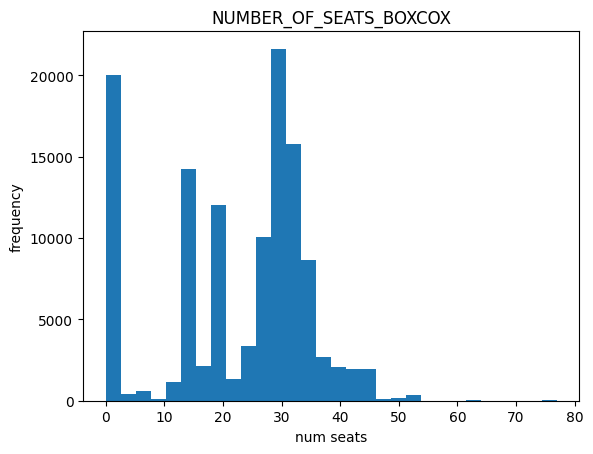

In [212]:
plt.hist(inventory_new["NUMBER_OF_SEATS_BOXCOX"].dropna(), bins=30)
plt.title("NUMBER_OF_SEATS_BOXCOX")
plt.xlabel("num seats")
plt.ylabel("frequency")
plt.show()

In [209]:
inventory_new['CAPACITY_IN_POUNDS_BOXCOX'].skew()

0.22209666134064407

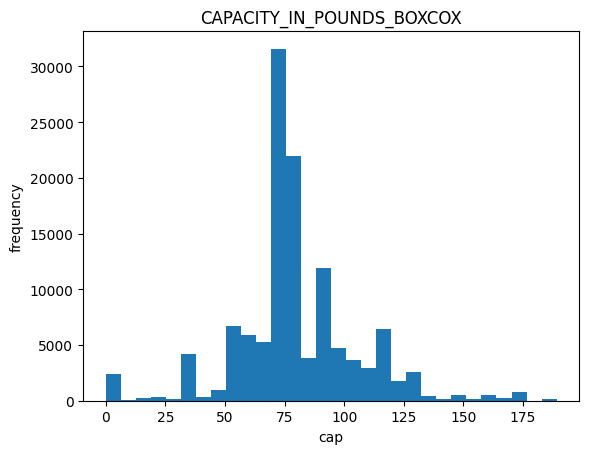

In [213]:
plt.hist(inventory_new["CAPACITY_IN_POUNDS_BOXCOX"].dropna(), bins=30)
plt.title("CAPACITY_IN_POUNDS_BOXCOX")
plt.xlabel("cap")
plt.ylabel("frequency")
plt.show()

In [ ]:
# the distributions for both number of seats and capacity in pounds after box cox transformation look more uniform, although there is still definitely some minor skew in both.
# particularly, number of seats has a high frequency of lower bin values. this is explained by the 0 values that exist for many of the non-passenger aircrafts in the database
# capacity in pounds has a much more normal distribution

### 5. Feature Engineering

In [214]:
# quartiles
q1 = inventory_new["NUMBER_OF_SEATS"].quantile(0.25)
q2 = inventory_new["NUMBER_OF_SEATS"].quantile(0.50)
q3 = inventory_new["NUMBER_OF_SEATS"].quantile(0.75)

def seat_size(x):
    if pd.isna(x):
        return pd.NA
    elif x < q1:
        return "SMALL"
    elif x < q2:
        return "MEDIUM"
    elif x < q3:
        return "LARGE"
    else:
        return "XLARGE"

inventory_new["SIZE"] = inventory_new["NUMBER_OF_SEATS"].apply(seat_size)


C:\Users\kcui2\AppData\Local\Temp\ipykernel_16144\2106400956.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_new["SIZE"] = inventory_new["NUMBER_OF_SEATS"].apply(seat_size)


Provide and plot the proportions of aircrafts that are operating versus not.

In [216]:
op_prop = (
    inventory_new.groupby("SIZE")["OPERATING_STATUS"]
      .value_counts(normalize=True)
      .unstack()
)

op_prop


OPERATING_STATUS,N,Y
SIZE,,
LARGE,0.033265,0.966735
MEDIUM,0.063896,0.936104
SMALL,0.034505,0.965495
XLARGE,0.025388,0.974612


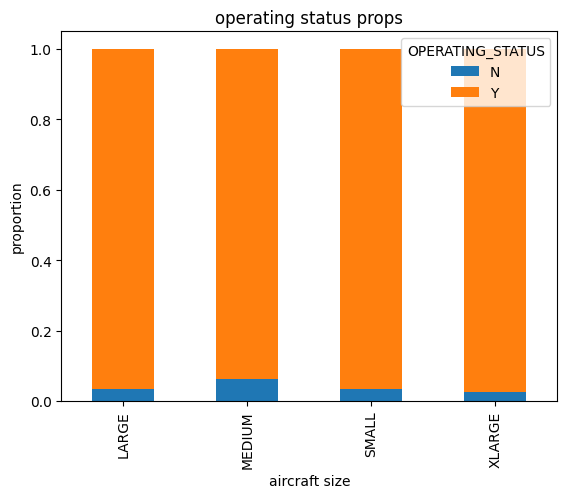

In [218]:
op_prop.plot(kind="bar", stacked=True)
plt.title("operating status props")
plt.ylabel("proportion")
plt.xlabel("aircraft size")
plt.legend(title="OPERATING_STATUS")
plt.show()


Provide and plot the proportions of aircrafts belonging to each aircraft status group.

In [219]:
status_prop = (
    inventory_new.groupby("SIZE")["AIRCRAFT_STATUS"]
      .value_counts(normalize=True)
      .unstack()
)

status_prop

AIRCRAFT_STATUS,A,B,O
SIZE,,,
LARGE,0.115628,0.231366,0.653006
MEDIUM,0.061536,0.524071,0.414393
SMALL,0.036976,0.236464,0.726560
XLARGE,0.070159,0.225471,0.704370


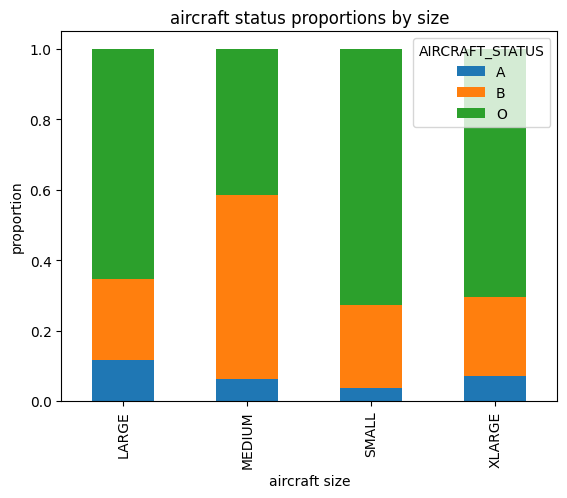

In [220]:
status_prop.plot(kind="bar", stacked=True)
plt.title("aircraft status proportions by size")
plt.ylabel("proportion")
plt.xlabel("aircraft size")
plt.legend(title="AIRCRAFT_STATUS")
plt.show()

## Written Summary of Findings

### Operating Status
Based on the plot of proportions for operating status, it's clear that the large majority of aircrafts in the data set are currently operating. For each size quartile, there is less than 15% of the aircrafts that are NOT operating, with aircrafts of medium size having the most aircrafts not operating.

### Aircraft Status
Based on the plot of proportions for aircraft status, the majority of aircrafts in the data set are owned (labeled "O"), with the exception of medium sized aircrafts having a larger proportion of operating leased (labeled "B"). All of the size buckets have a small (less than 17.5%) proportion of aircrafts under a capital lease.

# Submission guidelines
Your submission should be contained in a `homework_1` folder of your Github repository, and it should include 
- a `readme.md` file including how to run the code and what your expected outputs are (if the code is run), 
- your source code, and
- a `.pdf` or `.html` file containing your written answers.

# Generative AI disclosure

*Syllabus* policy: 

Required disclosure: each submission must include an AI Usage note stating: (1) tool(s) used, (2) the key prompt(s), and (3) what you changed and how you verified the results. If none, write: “AI Usage: None.”

(1) ChatGPT

(2) Key Prompts
- Can you confirm that model and aircraft type can be accurately determined from serial number and tail number?
- Based on the manufacturer column, can you create a list of common keys for the messy values to be standardized into?
- What is a regex expression for inserting space between lower case and upper case letters?

(3) Changes and Verification
- model and aircraft confirmed can be determined from serial and tail number if another exact same data row exists
- used the common keys given to create the buckets for the manufacturer standardization, since I noticed a lot of different naming for the same few carriers
- r"(?<=[A-Z])(?=\d)" --> used this